In [1]:
import os
import random
import numpy
import matplotlib.pyplot
import imageio
import itertools
from google.colab.patches import cv2_imshow
import cv2

ModuleNotFoundError: No module named 'google'

In [ ]:

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [ ]:
rgb = cv2.imread('bridge.jpg')
target_im = rgb2gray(rgb)
img_arr = numpy.asarray(target_im/255, dtype=numpy.float)


In [2]:
target_im

NameError: name 'target_im' is not defined

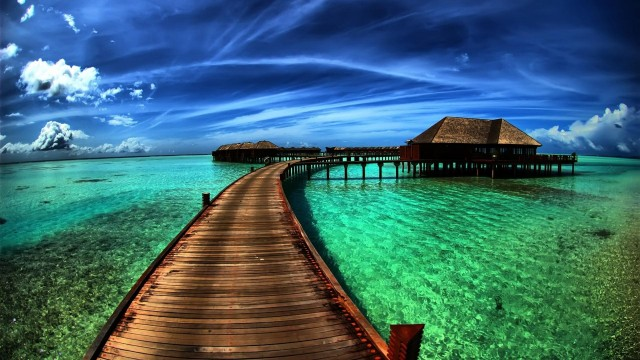

In [ ]:
cv2_imshow(rgb)

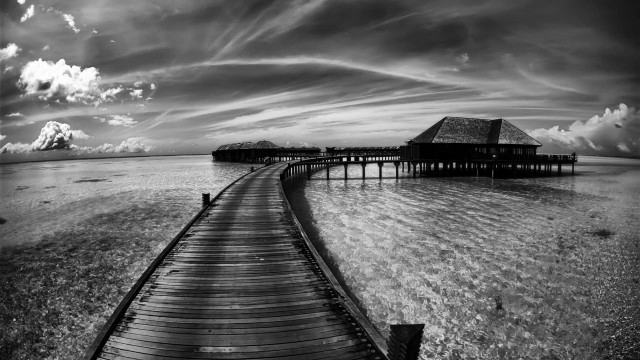

In [ ]:
cv2_imshow(target_im)

In [ ]:
def reduce(function, iterable, initializer=None):
    it = iter(iterable)
    if initializer is None:
        value = next(it)
    else:
        value = initializer
    for element in it:
        value = function(value, element)
    return value

In [ ]:
def mul(a, b):
    "Same as a * b."
    return a * b

In [ ]:
def img2chromosome(img_arr):
     chromosome = numpy.reshape(a=img_arr, newshape=(reduce(mul, img_arr.shape)))

     return chromosome


In [ ]:
def chromosome2img(chromosome, img_shape):
    img_arr = numpy.reshape(a=chromosome, newshape=img_shape)

    return img_arr

In [ ]:
def initial_population(img_shape, n_individuals=8):
     init_population = numpy.empty(shape=(n_individuals, reduce(mul, img_shape)), dtype=numpy.uint8)

     for indv_num in range(n_individuals):
         init_population[indv_num, :] = numpy.random.random(reduce(mul, img_shape))*256

     return init_population

In [ ]:
def fitness(target_chrom, indiv_chrom):
     quality = numpy.mean(numpy.abs(target_chrom-indiv_chrom))
     quality = numpy.sum(target_chrom) - quality

     return quality

In [ ]:
def cal_pop_fitness(target_chrom, pop):
     qualities = numpy.zeros(pop.shape[0])
     for indv_num in range(pop.shape[0]):
         qualities[indv_num] = fitness(target_chrom, pop[indv_num, :])

     return qualities

In [ ]:
def select_mating_pool(pop, qualities, num_parents):
     parents = numpy.empty((num_parents, pop.shape[1]), dtype=numpy.uint8)
     for parent_num in range(num_parents):
         max_qual_idx = numpy.where(qualities == numpy.max(qualities))
         max_qual_idx = max_qual_idx[0][0]
         parents[parent_num, :] = pop[max_qual_idx, :]
         qualities[max_qual_idx] = -1

     return parents

In [ ]:
def crossover(parents, img_shape, n_individuals=8):
    new_population = numpy.empty(shape=(n_individuals, reduce(mul, img_shape)), dtype=numpy.uint8)
    
    new_population[0:parents.shape[0], :] = parents
 
    num_newly_generated = n_individuals-parents.shape[0]
    parents_permutations = list(itertools.permutations(iterable=numpy.arange(0, parents.shape[0]), r=2))
    selected_permutations = random.sample(range(len(parents_permutations)), num_newly_generated)
    
    comb_idx = parents.shape[0]
    for comb in range(len(selected_permutations)):
        selected_comb_idx = selected_permutations[comb]
        selected_comb = parents_permutations[selected_comb_idx]
        
        half_size = numpy.int32(new_population.shape[1]/2)
        new_population[comb_idx+comb, 0:half_size] = parents[selected_comb[0], 0:half_size]
        new_population[comb_idx+comb, half_size:] =  parents[selected_comb[1], half_size:]
    
    return new_population

In [ ]:
def mutation(population, num_parents_mating, mut_percent):

    for idx in range(num_parents_mating, population.shape[0]):


        rand_idx = numpy.uint32(numpy.random.random(size=numpy.uint32(mut_percent/100*population.shape[1]))*population.shape[1])


        new_values = numpy.uint8(numpy.random.random(size=rand_idx.shape[0])*256)


        population[idx, rand_idx] = new_values


    return population

In [ ]:
def save_images(curr_iteration, qualities, new_population, im_shape, save_point, save_dir):
   
    if(numpy.mod(curr_iteration, save_point)==0):
        best_solution_chrom = new_population[numpy.where(qualities == numpy.max(qualities))[0][0], :]
        best_solution_img = chromosome2img(best_solution_chrom, im_shape)
        matplotlib.pyplot.imsave(save_dir+'solution_'+str(curr_iteration)+'.png', best_solution_img)

In [ ]:
def show_indivs(individuals, im_shape):
   
    num_ind = individuals.shape[0]
    fig_row_col = 1
    for k in range(1, numpy.uint16(individuals.shape[0]/2)):
        if numpy.floor(numpy.power(k, 2)/num_ind) == 1:
            fig_row_col = k
            break
    fig1, axis1 = matplotlib.pyplot.subplots(fig_row_col, fig_row_col)

    curr_ind = 0
    for idx_r in range(fig_row_col):
        for idx_c in range(fig_row_col):
            if(curr_ind>=individuals.shape[0]):
                break
            else:
                curr_img = chromosome2img(individuals[curr_ind, :], im_shape)
                axis1[idx_r, idx_c].imshow(curr_img)
                curr_ind = curr_ind + 1

Streaming output truncated to the last 5000 lines.
Quality :  92654.77210648608 , Iteration :  5000
Quality :  92654.77287471524 , Iteration :  5001
Quality :  92654.77326968053 , Iteration :  5002
Quality :  92654.77375579164 , Iteration :  5003
Quality :  92654.77405961108 , Iteration :  5004
Quality :  92654.77509259719 , Iteration :  5005
Quality :  92654.77509259719 , Iteration :  5006
Quality :  92654.77509259719 , Iteration :  5007
Quality :  92654.77551360414 , Iteration :  5008
Quality :  92654.77556568747 , Iteration :  5009
Quality :  92654.77625145136 , Iteration :  5010
Quality :  92654.77716724997 , Iteration :  5011
Quality :  92654.77716724997 , Iteration :  5012
Quality :  92654.77716724997 , Iteration :  5013
Quality :  92654.77716724997 , Iteration :  5014
Quality :  92654.77755787497 , Iteration :  5015
Quality :  92654.7778833958 , Iteration :  5016
Quality :  92654.77829138191 , Iteration :  5017
Quality :  92654.77829138191 , Iteration :  5018
Quality :  92654.77

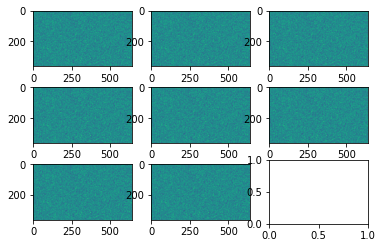

In [ ]:

# target_im = scipy.misc.imread('fruit.jpg')
target_chromosome = img2chromosome(img_arr)

 

# Population size

sol_per_pop = 8

# Mating pool size

num_parents_mating = 4

# Mutation percentage

mutation_percent =  0.0005

 



num_possible_permutations = len(list(itertools.permutations(iterable=numpy.arange(0,num_parents_mating), r=2)))

num_required_permutations = sol_per_pop-num_possible_permutations

if(num_required_permutations>num_possible_permutations):

    print(

    "\n*Inconsistency in the selected populatiton size or number of parents.*"

    "\nImpossible to meet these criteria.\n"

    )

    sys.exit(1)


# Creating an initial population randomly.

new_population = initial_population(img_shape=target_im.shape, n_individuals=sol_per_pop)

for iteration in range(10000):

    # Measing the fitness of each chromosome in the population.

    qualities = cal_pop_fitness(target_chromosome, new_population)

    print('Quality : ', numpy.max(qualities), ', Iteration : ', iteration)

   

    # Selecting the best parents in the population for mating.

    parents = select_mating_pool(new_population, qualities, num_parents_mating)

   

    # Generating next generation using crossover.

    new_population = crossover(parents, target_im.shape, n_individuals=sol_per_pop)

 


    new_population = mutation(population=new_population,num_parents_mating=num_parents_mating,mut_percent=mutation_percent)

    

    save_images(iteration, qualities, new_population, target_im.shape,save_point=500, save_dir=os.curdir+'//')

# Display the final generation

show_indivs(new_population, target_im.shape)
    